## Image Filtering

This notebook demonstrates the impact of applying different filters to images.

**pre-requisiste:**

Install openCV module using the following command

```pip install opencv-python
```

### Import Libraries

In [15]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

### Load the ascent image from scipy

In [28]:
i = misc.ascent()
print('Image shape: {}'.format(i.shape))
#print(i[100:124, 100:115])

Image shape: (512, 512)


### Display the raw image (without applying filter)

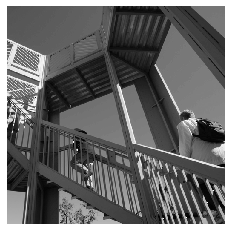

In [19]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

### Create a transformed image

In [93]:
# created a transformed image by creating a copy of the original image
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print('Image shape: {}'.format(i_transformed.shape))

Image shape: (512, 512)


### Convolve an Image with a filter

In [103]:
def convolveImage(transformedImage, filter, weights):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0
            convolution = convolution + (i[x-1, y-1] * filter[0][0])
            convolution = convolution + (i[x, y-1] * filter[1][0])
            convolution = convolution + (i[x+1, y-1] * filter[2][0])
            convolution = convolution + (i[x-1, y] * filter[0][1])
            convolution = convolution + (i[x, y] * filter[1][1])
            convolution = convolution + (i[x+1, y] * filter[2][1])
            convolution = convolution + (i[x-1, y+1] * filter[0][2])
            convolution = convolution + (i[x, y+1] * filter[1][2])
            convolution = convolution + (i[x+1, y+1] * filter[2][2])
            convolution = convolution * weights

            if (convolution < 0):
                convolution=0
            elif (convolution > 255):
                convolution = 255
            transformedImage[x,y] = convolution
            
    return transformedImage

### Filter to spot horizontal edges in an image

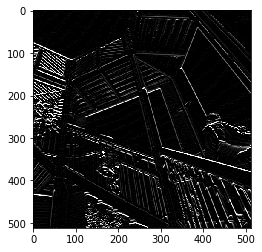

In [117]:
filter = [[-1, -2, -1], 
          [ 0, 0, 0], 
          [ 1, 2, 1]]
weight = 1

i_transformed = np.copy(i)
i_transformed = convolveImage(i_transformed, filter, weight)
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

### Filter to spot vertical edges in an image

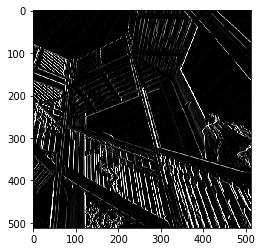

In [118]:
filter = [[-1, 0, 1], 
          [-2, 0, 2], 
          [-1, 0, 1]]

i_transformed = np.copy(i)
i_transformed = convolveImage(i_transformed, filter, weight)
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

### Filter to blur the image

Blurring is done for example by taking the average of the current pixel and its 4 neighbors. Take the sum of the current pixel and its 4 neighbors, and divide it through 5, or thus fill in 5 times the value 0.2 in the filter:

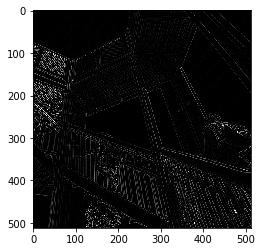

In [119]:
filter = [ [0,  1, 0], 
           [1, -4, 1], 
           [0,  1, 0]]

#i_transformed = convolveImage(i_transformed, filter, 0.2)
i_transformed = np.copy(i)
i_transformed = convolveImage(i_transformed, filter, 1)
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

### Motion filter

Motion blur is achieved by blurring in only 1 direction. For best results use a 9x9 motion blur filter but for now we are using 3x3 image.

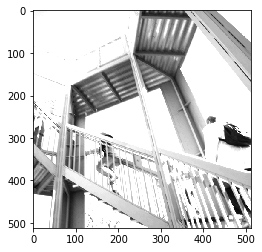

In [120]:
filter = [[1,  0, 0], 
          [0,  1, 0], 
          [0,  0, 1]]

i_transformed = np.copy(i)
i_transformed = convolveImage(i_transformed, filter, 1)
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

### Filter to sharpen the image

To sharpen the image is very similar to finding edges, add the original image, and the image after the edge detection to each other, and the result will be a new image where the edges are enhanced, making it look sharper. Note the sum of the filter elements is 1 and the result will be an image with the same brightness as the original, but sharper. 

**Note:** This will be more prominent in color images.

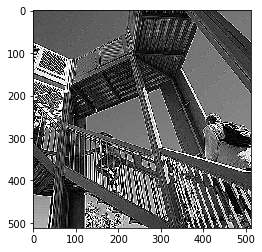

In [121]:
filter = [ [-1, -1, -1], 
           [-1,  9, -1], 
           [-1, -1, -1]]

i_transformed = np.copy(i)
i_transformed = convolveImage(i_transformed, filter, 1)
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

### Apply MaxPooling to convolved image

In [129]:
new_x = int(size_x/2)
new_y = int(size_y/2)

def applyMaxPooling(transformedImage, newImage):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            pixels = []
            pixels.append(transformedImage[x, y])
            pixels.append(transformedImage[x+1, y])
            pixels.append(transformedImage[x, y+1])
            pixels.append(transformedImage[x+1, y+1])
            newImage[int(x/2),int(y/2)] = max(pixels)
        
    return newImage

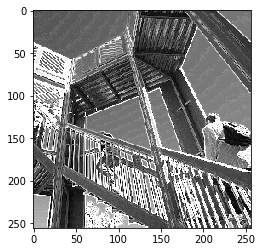

In [130]:
filter = [ [-1, -1, -1], 
           [-1,  9, -1], 
           [-1, -1, -1]]

i_transformed = np.copy(i)
newImage = np.zeros((new_x, new_y))

i_transformed = convolveImage(i_transformed, filter, 1)
pooledImage = applyMaxPooling(i_transformed, newImage)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(pooledImage)
plt.show()